In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x = np.array(data[['YearsExperience']])  ## feature

In [5]:
x.shape

(30, 1)

In [6]:
y = np.array(data['Salary'])   ## target

In [7]:
y.shape

(30,)

In [8]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
### Split the data into training and testing

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=9014)

In [11]:
xtest

array([[ 3.2],
       [ 7.9],
       [ 2. ],
       [ 3.9],
       [10.3],
       [ 9.5]])

In [12]:
### Build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
### Train the model
model.fit(xtrain,ytrain)

LinearRegression()

In [14]:
### Prediction / Testing
ypred = model.predict(xtest)
ypred

array([ 56182.55053157, 100294.69682063,  44919.8748833 ,  62752.44465973,
       122820.04811718, 115311.59768499])

In [15]:
xtest

array([[ 3.2],
       [ 7.9],
       [ 2. ],
       [ 3.9],
       [10.3],
       [ 9.5]])

In [16]:
ytest

array([ 54445., 101302.,  43525.,  63218., 122391., 116969.])

In [17]:
### R-Square (R2 Score)
from sklearn.metrics import r2_score
score = r2_score(ytest,ypred)
score*100

99.842716176972

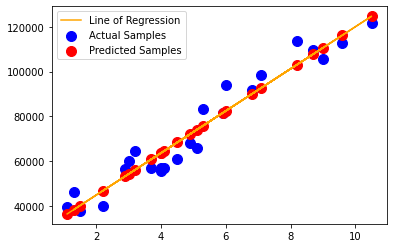

In [18]:
### Line of Regression (Training Samples)
plt.scatter(xtrain,ytrain,color="blue",label="Actual Samples",s=100)
plt.scatter(xtrain,model.predict(xtrain),color="red",label="Predicted Samples",s=100)
plt.plot(xtrain,model.predict(xtrain),color="orange",label="Line of Regression")
plt.legend()
plt.show()

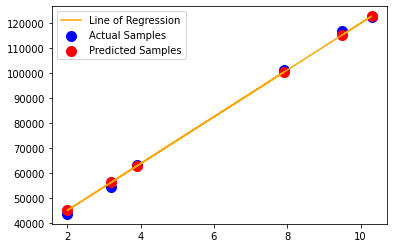

In [19]:
### Line of Regression (Testing Samples)
plt.scatter(xtest,ytest,color="blue",label="Actual Samples",s=100)
plt.scatter(xtest,model.predict(xtest),color="red",label="Predicted Samples",s=100)
plt.plot(xtest,model.predict(xtest),color="orange",label="Line of Regression")
plt.legend()
plt.show()

In [20]:
### Increase Accuracy
### Cross Validation

In [21]:
accuracy = []
for i in range(10000):
    xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,train_size=0.8,random_state=i)
    model1 = LinearRegression()
    model1.fit(xtrain1,ytrain1)
    ypred1 = model1.predict(xtest1)
    score1 = r2_score(ytest1,ypred1)
    accuracy.append(score1)

In [22]:
np.max(accuracy)

0.99842716176972

In [23]:
np.argmax(accuracy)

9014

In [24]:
### Creating Web Application

In [27]:
### Save the model
import joblib
joblib.dump(model,"salary.pkl")

['salary.pkl']

In [29]:
mymodel = joblib.load("salary.pkl")

In [30]:
mymodel.predict([[10]])

array([120004.37920511])

In [31]:
round(mymodel.predict([[10]])[0],2)

120004.38

In [28]:
!pip install streamlit --quiet

In [29]:
!pip install pyngrok==4.1.1 --quiet

In [30]:
from pyngrok import ngrok

In [31]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [32]:
public_url = ngrok.connect(port = "8501")
print(public_url)

http://ca68-34-125-219-50.ngrok.io


In [33]:
### Flask

In [32]:
### open the pickle file in read mode rb
#8. model -> resuable by the front end HTML page(input page) 
## deploy ML program in application format using flask 
from flask import Flask , request, render_template, jsonify

In [33]:
app = Flask(__name__)

In [34]:
##resuable by the front end HTML page(input page)
@app.route('/')  ## landing page or home page or input page 
def home():
    return render_template('index.html')

In [ ]:
@app.route('/predict', methods = ['POST'] )## landing page or home page or input page 
def predict():
    ## take all input values from the form by the user 
    usr_input = [float(x) for x in request.form.values()] 
    #create array 
    usr_input_array = [np.array(usr_input)]
    #feed the usr_input_array to the predict function
    prediction = model.predict(usr_input_array)[0]
    return render_template('index.html', prediction_text  = 'Predicted Salary={}'.format(prediction)) ## output the species 


In [ ]:
if __name__ == "__main__":
    app.run(debug = False)